In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# カメラ設定
FOV_H = 87 # 横方向の視野角 holizontal
FOV_V = 58 # 縦方向の視野角 vertical
Height = 675 # カメラの高さ[mm]
W , H = 1280, 720 # カメラの解像度 width, height
# ボールの設定
R = 85 # ボールの直径[mm]
# 状況設定
theta1 = 50 # Z軸に対するカメラの角度[deg]
theta2 = 30 # Z軸周りのカメラの回転角[deg]
theta3 = 20 # グローバル座標に対するロボットの回転角[deg] yaw
Rx, Ry = 200, 1000 # グローバル座標でのロボットの位置[mm]
u = 300 # ボールの画像上のx座標[pixel] 左が原点で右が正
v = 500 # ボールの画像上のy座標[pixel] 上が原点で下が正

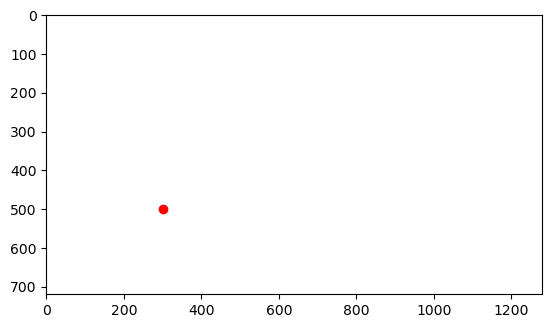

In [10]:
# 画像を表示
fig, ax = plt.subplots()
ax.set_xlim(0, W)
ax.set_ylim(0, H)
ax.set_aspect('equal')
ax.scatter(u, v, color='red')
# 左上を原点とする
ax.invert_yaxis()
plt.show()

カメラ画像にボールがどのように映っているのか。

473.0549547473912 473.05495474739126


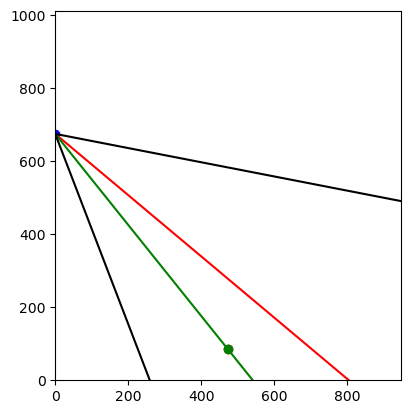

In [13]:
# カメラからボールまでの距離を求める
# 深度情報を使わない場合
omega = (H/2 - v)*FOV_V/H
x1 = (Height - R)*np.tan(np.deg2rad(theta1 + omega))
# 画像上の座標を使わない場合
Depth = (Height - R)*np.cos(np.deg2rad(omega))/np.cos(np.deg2rad(theta1 + omega)) # ボールの深度[cm]
x2 = (Depth - (Height - R)*np.cos(np.deg2rad(theta1))) / np.sin(np.deg2rad(theta1))
print(x1, x2)
# 横から見た図をプロット
fig, ax = plt.subplots()
ax.set_xlim(0, max(x1, x2)*2)
ax.set_ylim(0, Height*1.5)
ax.set_aspect('equal')
ax.scatter(0, Height, color='blue') # カメラ
ax.scatter(x1, R, color='red') # 深度情報を使った場合のボールの位置
ax.scatter(x2, R, color='green') # 画像上の座標を使った場合のボールの位置
x = np.linspace(0, max(x1, x2)*2, 100)
y1 = -np.tan(np.pi/2 - np.deg2rad(theta1))*x + Height # カメラの向きをプロット
y2 = -np.tan(np.pi/2 - np.deg2rad(theta1 + omega))*x + Height # ボールの方向をプロット
y3 = -np.tan(np.pi/2 - np.deg2rad(theta1 + FOV_V/2))*x + Height # FOVの上限をプロット
y4 = -np.tan(np.pi/2 - np.deg2rad(theta1 - FOV_V/2))*x + Height # FOVの下限をプロット
ax.plot(x, y1, color='red')
ax.plot(x, y2, color='green')
ax.plot(x, y3, color='black')
ax.plot(x, y4, color='black')
plt.show()

カメラとボールの位置関係を横から見るとどうなるか。

黒線：視野範囲

赤線：カメラの向き

緑線：ボールの方向

緑点：深度を使って計算したボールの位置

赤点：画像上の座標を使って計算したボールの位置

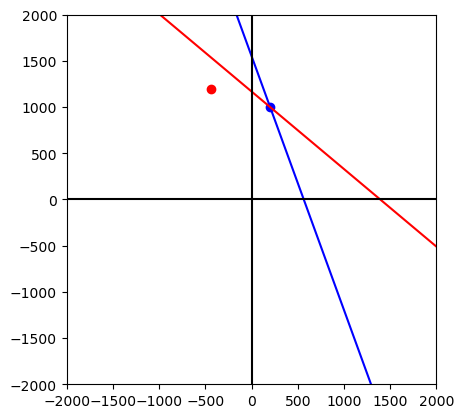

In [7]:
# ボールの位置はX1とX2の平均を使う
X = (x1 + x2) / 2
# ボールの位置をグローバル座標に変換
omega = (W/2 - u)*FOV_H/W
x, y = -X*np.sin(np.deg2rad(theta2+theta3+omega)), X*np.cos(np.deg2rad(theta2+theta3+omega))
Bx, By = Rx + x, Ry + y
# ロボットとボールの位置をプロット
fig, ax = plt.subplots()
ax.set_xlim(-2000, 2000)
ax.set_ylim(-2000, 2000)
ax.set_aspect('equal')
ax.scatter(Rx, Ry, color='blue') # ロボット
ax.scatter(Bx, By, color='red') # ボール
x = np.linspace(-2000, 2000, 100)
# (Rx, Ry)を通る傾きtheta3の直線
y = np.tan(np.pi/2 + np.deg2rad(theta3))*(x - Rx) + Ry
ax.plot(x, y, color='blue')
y = np.tan(np.pi/2 + np.deg2rad(theta2+theta3))*(x - Rx) + Ry
ax.plot(x, y, color='red')
# x軸とy軸をプロット
ax.plot(x, np.zeros(100), color='black')
ax.plot(np.zeros(100), x, color='black')
plt.show()

グローバル座標系でロボットを上から見た図  
青線：ロボットの向き  
赤線：カメラの向き  
青点：ロボットの位置  
赤点：ボールの位置